In [1]:
import igraph as ig
import matplotlib.pyplot as plt

## Creating Graph by Hand

For creating a basic graph we need to specify the number of nodes and an edge list.

> Edges are list of tuples

`Graph(n_vertices, edges)` is the call to the constructor.

To specify a directed or undirected graph simply pass `directed=True` to the constructor. (default is `False`)

There is also a build in function to plot a graph: `plot(graph_name)`.

As we specify vertexes and edges we can use `Integers` o `Strings` as node ids.

> If we use `Strings` is easier to add `nodes` and `edges` with `add_vertices()`, `add_vertices` instead of passing them directly
through the constructor.

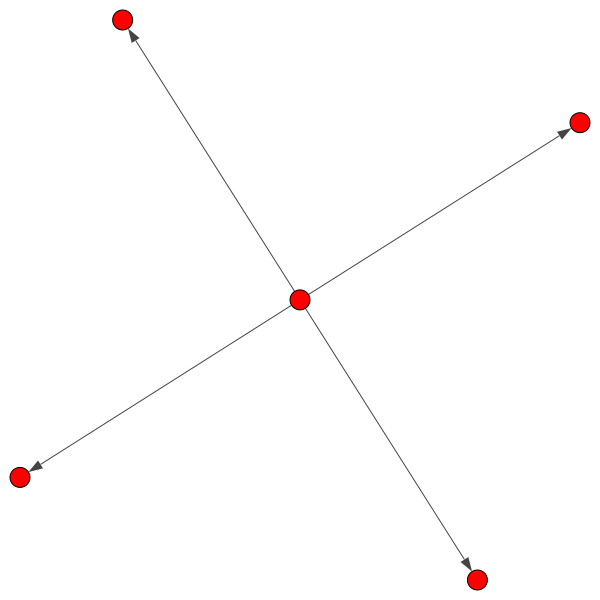

In [7]:
#Creating a Star like graph using Integers
edges = [(0, 1), (0, 2), (0, 3), (0, 4)]
int_graph = ig.Graph(edges,directed=True)
ig.plot(int_graph)

Note that in this example we passed the list of edges to the constructor. The number of nodes is inferred.

We will see other parameters later on.

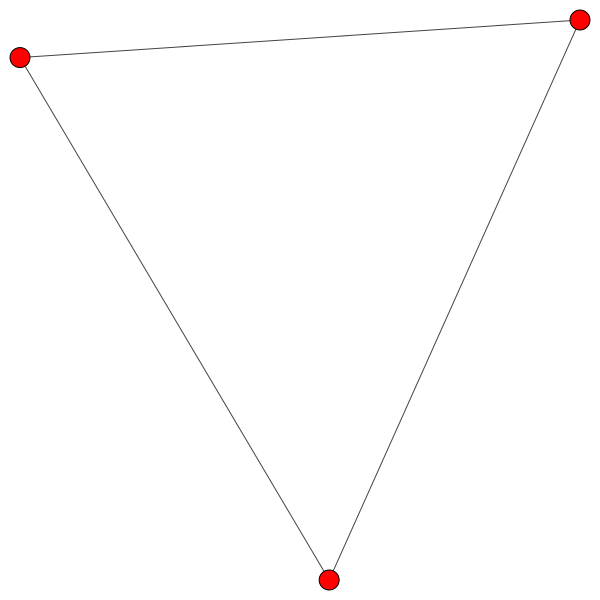

In [3]:
# Creating a triangular graph with string nodes.
str_graph = ig.Graph()
str_graph.add_vertices(["node1", "node2", "node3"])
str_graph.add_edges([("node1", "node2"), ("node2", "node3"), ("node3", "node1")])
ig.plot(str_graph)

Note that in this example we first create a `Graph` object and the we pass add nodes and edges.
> Avoid `for` cycles to add nodes/vertexes and pass a list of values, since it is faster.

Keep in mind that if you try to pass a list of edges of type `tuple(str,str)` you will get a TypeError.
> Use the second method that we saw if you need Strings.

> **Nodes are still converted to `int`!**


```Python
edges = [("node1", "node2"), ("node2", "node3"), ("node3", "node1")]
print(type(edges))
wrong_graph = ig.Graph(edges)
```
```DocTest
<class 'list'>
TypeError: only non-negative integers, strings or igraph.Vertex objects can be converted to vertex IDs
```

## Adding attributes to graph, edges and nodes

We can set attributes to the graph with `graph_name["an_attribute"] = "an_attribute_value" `.

We can also add attributes to all the nodes/edges or to a single node/edge:

- `graph_name.vs["nodes_attribute_name"] = "List of values"`
- `graph_name.es["edges_attribute_name"] = "List of values"`
- `graph_name.vs[node_id]["node_attribute_name"] = "a_value"`
- `graph_name.es[edge_id]["edge_attribute_name"] = "a_values"`

> The id depends on the order of declaration in you used `str` nodes.

=====OLD Attributes======

Vertex Iterator: [igraph.Vertex(<igraph.Graph object at 0x765c95ffea50>, 0, {'name': 'node1'}), igraph.Vertex(<igraph.Graph object at 0x765c95ffea50>, 1, {'name': 'node2'}), igraph.Vertex(<igraph.Graph object at 0x765c95ffea50>, 2, {'name': 'node3'})]

Edges Iterator:[igraph.Edge(<igraph.Graph object at 0x765c95ffea50>, 0, {}), igraph.Edge(<igraph.Graph object at 0x765c95ffea50>, 1, {}), igraph.Edge(<igraph.Graph object at 0x765c95ffea50>, 2, {})]



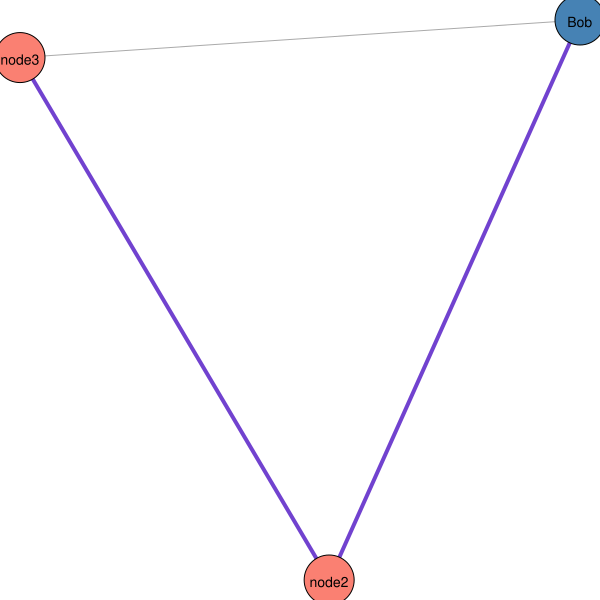

In [4]:
print("=====OLD Attributes======\n")
print(f"Vertex Iterator: {list(str_graph.vs)}\n")
print(f"Edges Iterator:{list(str_graph.es)}\n")

str_graph.vs[0]["name"] = "Bob"
str_graph.es["A_cool_attribute"] = [True,True,False]
ig.plot(
    str_graph,
    vertex_size=50,
    vertex_label=str_graph.vs["name"],
    vertex_color=["steelblue" if name == "Bob" else "salmon" for name in str_graph.vs["name"]],
    edge_width=[4 if A_cool_attribute else 1 for A_cool_attribute in str_graph.es["A_cool_attribute"]],
    edge_color=["#7142cf" if A_cool_attribute else "#AAA" for A_cool_attribute in str_graph.es["A_cool_attribute"]]
)


In [5]:
print("=====NEW Attributes======\n")
print(f"Vertex Iterator: {list(str_graph.vs)}\n")
print(f"Edges Iterator:{list(str_graph.es)}\n")

=====NEW Attributes======

Vertex Iterator: [igraph.Vertex(<igraph.Graph object at 0x765c95ffea50>, 0, {'name': 'Bob'}), igraph.Vertex(<igraph.Graph object at 0x765c95ffea50>, 1, {'name': 'node2'}), igraph.Vertex(<igraph.Graph object at 0x765c95ffea50>, 2, {'name': 'node3'})]

Edges Iterator:[igraph.Edge(<igraph.Graph object at 0x765c95ffea50>, 0, {'A_cool_attribute': True}), igraph.Edge(<igraph.Graph object at 0x765c95ffea50>, 1, {'A_cool_attribute': True}), igraph.Edge(<igraph.Graph object at 0x765c95ffea50>, 2, {'A_cool_attribute': False})]



Note that the nodes and edges are converted to `int`.

More plotting attributes examples in the [quickstart documentation](https://python.igraph.org/en/latest/tutorials/quickstart.html#sphx-glr-tutorials-quickstart-py).

Given a node or edge, attributes are accessible with `[]` operator.

In [6]:
interesting_node = str_graph.vs[0]
print("The name of the node is: " +  interesting_node["name"])

The name of the node is: Bob
